#  <font color='red'> Logistic regression </font> 

Logistic regression is a discriminative classifier similar to perceptron, which assumes a linear discriminant
$$y(\mathbf x) = \mathbf w^T\mathbf x+w_0$$
 
The main difference with perceptron is the model used to fit the labels. It uses the model 

 $$p_1(\mathbf x) = s(\mathbf x) = \sigma\left(\underbrace{\begin{bmatrix}\mathbf w^T,w_0\end{bmatrix}}_{\mathbf a^T}\underbrace{\begin{bmatrix}\mathbf x,1\end{bmatrix}}_{\widetilde{\mathbf x}}\right) $$

to model the probability model for a specific $\mathbf x$ belonging to class 1 and 

 $$p_2(\mathbf x) = 1-s(\mathbf x) $$ 

 for a specific $\mathbf x$ to belong to class 2. The parameters of the model are estimated from the training data using ML estimation.
 
 



In [1]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.animation as ani


import numpy as np
import pandas as pd

plt.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = [12, 6]


In [2]:
fname = 'fishes.csv'
data = pd.read_csv(fname)
data.head(10)
data = data.head(10000)
# Exctracting the fields with Fishtype=1 (bass)
bass = data[data["Fishtype"] == 1]
basslightness = bass['lightness'].to_numpy()
basslength = bass['length'].to_numpy()
basscount = np.shape(basslength)[0]

# Exctracting the fields with Fishtype=0 (salmon)
salmon = data[data["Fishtype"] == 0]
salmonlightness = salmon['lightness'].to_numpy()
salmonlength = salmon['length'].to_numpy()

salmoncount = np.shape(salmonlightness)[0]


The log likelihood of a specific training data point $(\mathbf x_i,y_i)$ is given by 

$$\mathcal L(\mathbf x_i,y_i|\mathbf a) = -y_i \log(s_i) - (1-y_i)\log(1-s_i) $$
 

The gradient of the sum of the log likelihoods of all the points is given by 

$$\nabla L = -\mathbf X(\mathbf s-\mathbf y)^T$$

Thus, the steepest descent update is given by 

$$\mathbf a_{n+1} = \mathbf a_{n} + \gamma~ \mathbf X(\mathbf s-\mathbf y)^T$$

In [3]:
x1 = np.asmatrix(np.stack((salmonlightness,salmonlength,np.ones(salmonlength.shape)),axis=1))
x2 = np.asmatrix(np.stack((basslightness,basslength,np.ones(basslength.shape)),axis=1))

x1ones = np.asmatrix(np.ones((salmoncount,1)))
x2zeros = np.asmatrix(np.zeros((basscount,1)))

X = np.concatenate((x1,x2),axis=0)
Xtilde = X.T
y = np.concatenate((x1ones,x2zeros),axis=0).T



### Choose a random $\mathbf a$ and display the separating line

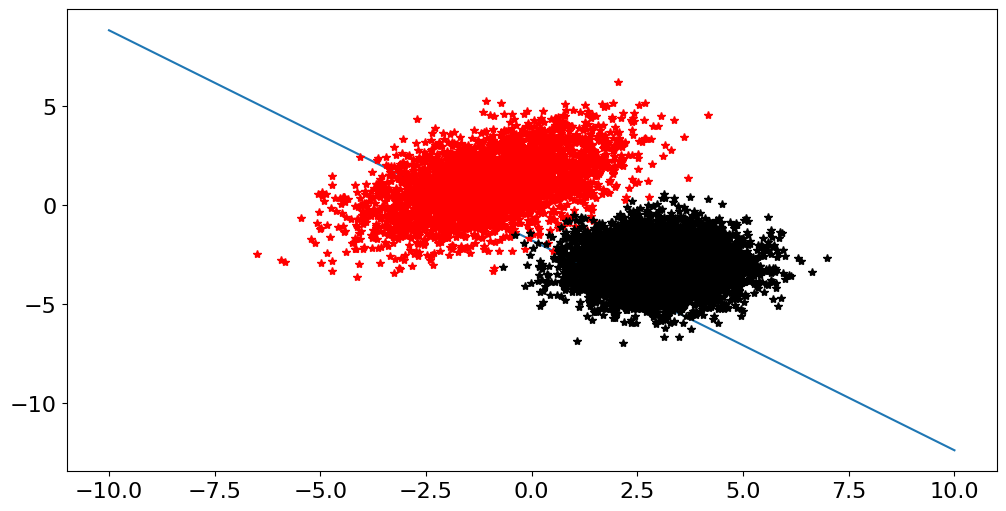

In [4]:
a = np.asmatrix(np.random.randn(3,1))

xvalues = np.linspace(-10,10,100)
xvalues = np.asmatrix(xvalues)
yvalues = -(a[0]*xvalues+a[2])/a[1]
s = plt.plot(xvalues.T,yvalues.T)
s = plt.plot(salmonlightness,salmonlength,'r*')
s = plt.plot(basslightness,basslength,'k*')

## Logistic regrssion algorithm ##

<font color=red>YOUR CODE HERE</font>

2615.938515740596
72.44120152082822
58.032432627621326
52.05342673059259
48.65060366813751
46.41323482251741
44.81413406788224
43.60725453523996
42.660816221877106
41.897244102366855
41.26760050279846
40.73933409954486
40.28986641612927
39.90299456656132
39.566758717784495
39.27211901331292
39.01210283056045
38.78123708701058
38.57515962747692
38.3903466681257
38.22391752038468
38.07349201766261
37.93708465403582
37.81302478511742
37.69989564871726
37.59648718652158
37.501759129123016
37.41481181174322
37.33486288158428
37.261228543892265


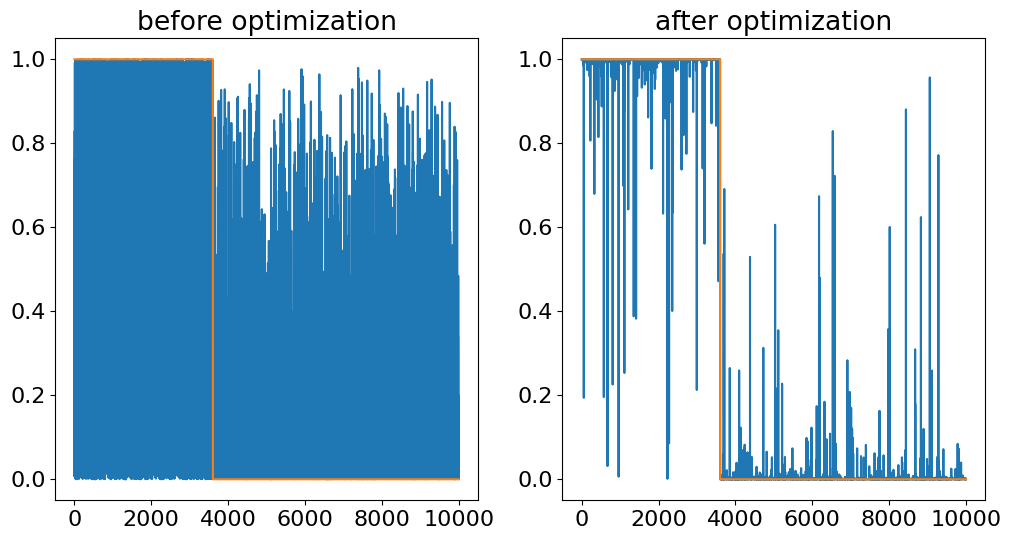

In [5]:
a = np.asmatrix(np.random.randn(3,1))

fig, ax = plt.subplots(1,2)
t = (a.T@Xtilde)
s = 1./(1+np.exp(-t))
p=ax[0].plot(s.T)
p=ax[0].plot(y.T)
p=ax[0].set_title("before optimization")
    
gamma = 5e-4
for i in range(3000):
    
    # YOUR CODE HERE: Replace the ? with your code

    s = 1 / (1 + np.exp(-a.T @ Xtilde))
    error = y - s
    gradient = Xtilde @ error.T
    a = a + gamma * gradient
    
    # DONE: YOUR CODE
    if(np.mod(i,100)==0):
        print(np.sum(np.abs(error)))

p=ax[1].plot(s.T)
p=ax[1].plot(y.T)
p=ax[1].set_title("after optimization")
plt.show()



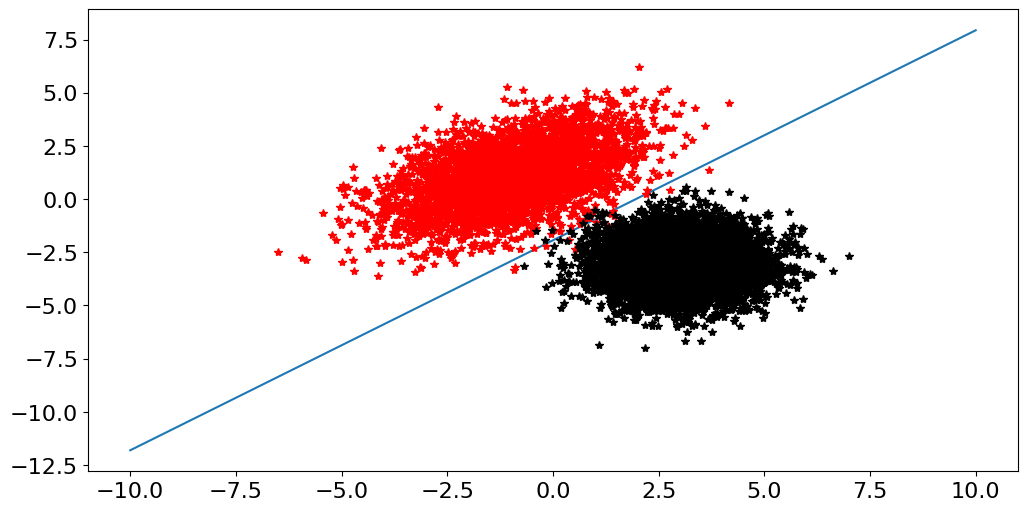

In [6]:

xvalues = np.linspace(-10,10,100)
xvalues = np.asmatrix(xvalues)
yvalues = -(a[0]*xvalues+a[2])/a[1]
s = plt.plot(xvalues.T,yvalues.T)
s = plt.plot(salmonlightness,salmonlength,'r*')
s = plt.plot(basslightness,basslength,'k*')